In [1]:
import pandas as pd

In [2]:
!pip install geopy

In [3]:
# Load the dataset
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Preview the dataset
print(df.head())
print(df.info())
print(df.describe())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [4]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [5]:
df_cleaned = df.copy()

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


In [7]:
df_cleaned = df_cleaned.drop(['approxdate', 'resolution'], axis=1)

In [8]:
df_cleaned = df_cleaned.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'})

In [9]:
df_cleaned['month'] = df_cleaned['month'].replace(0, 1)  # Replace invalid month with 1
df_cleaned['day'] = df_cleaned['day'].replace(0, 1)  # Replace invalid day with 1

In [10]:
# Ensure the columns are integer type
df_cleaned['year'] = df_cleaned['year'].astype(int)
df_cleaned['month'] = df_cleaned['month'].astype(int)
df_cleaned['day'] = df_cleaned['day'].astype(int)

In [11]:
# Create a datetime column
# Using errors='coerce' to handle any remaining invalid dates
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']], errors='coerce')

In [12]:
# Select relevant columns
columns_of_interest = [
    'date', 'ishostkid', 'nhostkid',
    'country', 'region', 'provstate', 'city',
    'gname', 'motive',
    'nkill', 'nwound', 'property', 'propvalue',
    'attacktype1', 'attacktype1_txt',
    'weaptype1', 'weaptype1_txt', 'ransompaidus',
    'targtype1', 'targtype1_txt', 'nkillus', 'latitude', 'longitude'
]

# Create a new DataFrame with selected columns
df_cleaned = df_cleaned[columns_of_interest]

In [13]:
df_cleaned.head()

,date,ishostkid,nhostkid,country,region,provstate,city,gname,motive,nkill,...,attacktype1,attacktype1_txt,weaptype1,weaptype1_txt,ransompaidus,targtype1,targtype1_txt,nkillus,latitude,longitude
0,1970-07-02,0.0,NaN,58,2,NaN,Santo Domingo,MANO-D,NaN,1.0,...,1,Assassination,13,Unknown,NaN,14,Private Citizens & Property,NaN,18.456792,-69.951164
1,1970-01-01,1.0,1.0,130,1,Federal,Mexico city,23rd of September Communist League,NaN,0.0,...,6,Hostage Taking (Kidnapping),13,Unknown,NaN,7,Government (Diplomatic),NaN,19.371887,-99.086624
2,1970-01-01,0.0,NaN,160,5,Tarlac,Unknown,Unknown,NaN,1.0,...,1,Assassination,13,Unknown,NaN,10,Journalists & Media,NaN,15.478598,120.599741
3,1970-01-01,0.0,NaN,78,8,Attica,Athens,Unknown,NaN,NaN,...,3,Bombing/Explosion,6,Explosives,NaN,7,Government (Diplomatic),NaN,37.997490,23.762728
4,1970-01-01,0.0,NaN,101,4,Fukouka,Fukouka,Unknown,NaN,NaN,...,7,Facility/Infrastructure Attack,8,Incendiary,NaN,7,Government (Diplomatic),NaN,33.580412,130.396361


In [14]:
# Replace missing values in column 'A' with 0
df_cleaned['nhostkid'].fillna(0, inplace=True)
df_cleaned['ishostkid'].fillna(0, inplace=True)
df_cleaned['city'].fillna('Unknown', inplace=True)
df_cleaned['provstate'].fillna('Unknown', inplace=True)
df_cleaned['motive'].fillna('Unknown', inplace=True)

df_cleaned.head()

,date,ishostkid,nhostkid,country,region,provstate,city,gname,motive,nkill,...,attacktype1,attacktype1_txt,weaptype1,weaptype1_txt,ransompaidus,targtype1,targtype1_txt,nkillus,latitude,longitude
0,1970-07-02,0.0,0.0,58,2,Unknown,Santo Domingo,MANO-D,Unknown,1.0,...,1,Assassination,13,Unknown,NaN,14,Private Citizens & Property,NaN,18.456792,-69.951164
1,1970-01-01,1.0,1.0,130,1,Federal,Mexico city,23rd of September Communist League,Unknown,0.0,...,6,Hostage Taking (Kidnapping),13,Unknown,NaN,7,Government (Diplomatic),NaN,19.371887,-99.086624
2,1970-01-01,0.0,0.0,160,5,Tarlac,Unknown,Unknown,Unknown,1.0,...,1,Assassination,13,Unknown,NaN,10,Journalists & Media,NaN,15.478598,120.599741
3,1970-01-01,0.0,0.0,78,8,Attica,Athens,Unknown,Unknown,NaN,...,3,Bombing/Explosion,6,Explosives,NaN,7,Government (Diplomatic),NaN,37.997490,23.762728
4,1970-01-01,0.0,0.0,101,4,Fukouka,Fukouka,Unknown,Unknown,NaN,...,7,Facility/Infrastructure Attack,8,Incendiary,NaN,7,Government (Diplomatic),NaN,33.580412,130.396361


In [15]:
columns = ['nwound', 'nkill']

# Replace missing values with the median value for each column
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        median_value = df_cleaned[column].median()
        df_cleaned[column].fillna(median_value, inplace=True)

In [16]:
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [18]:
# Fit and transform data with StandardScaler
df_standard_scaled = df_cleaned.copy()
df_standard_scaled[['nkill', 'nwound']] = scaler_standard.fit_transform(df_cleaned[['nkill', 'nwound']])

# Retrieve and print mean and standard deviation from StandardScaler
mean_values = scaler_standard.mean_
std_values = scaler_standard.scale_

print("StandardScaler:")
print("Means:", mean_values)
print("Standard Deviations:", std_values)

# Fit and transform data with MinMaxScaler
df_minmax_scaled = df_cleaned.copy()
df_minmax_scaled[['nkill', 'nwound']] = scaler_minmax.fit_transform(df_cleaned[['nkill', 'nwound']])

# Retrieve and print min and max values from MinMaxScaler
min_values = scaler_minmax.data_min_
max_values = scaler_minmax.data_max_

print("\nMinMaxScaler:")
print("Min Values:", min_values)
print("Max Values:", max_values)

StandardScaler:
Means: [2.26685967 2.88329637]
Standard Deviations: [11.22702619 34.30965287]

MinMaxScaler:
Min Values: [0. 0.]
Max Values: [1570. 8191.]


In [19]:
###  Exploratory Data Analysis
print(df_cleaned.describe())
print(df_cleaned['targtype1_txt'].value_counts())
print(df['attacktype1_txt'].value_counts())

                                date      ishostkid       nhostkid  \
count                         181691  181691.000000  181691.000000   
mean   2003-02-18 11:32:29.188457472       0.058996       0.338624   
min              1970-01-01 00:00:00      -9.000000     -99.000000   
25%              1991-02-06 00:00:00       0.000000       0.000000   
50%              2009-02-22 00:00:00       0.000000       0.000000   
75%              2014-08-09 00:00:00       0.000000       0.000000   
max              2017-12-31 00:00:00       1.000000   17000.000000   
std                              NaN       0.461022      55.306010   

             country         region          nkill         nwound  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean      131.968501       7.160938       2.266860       2.883296   
min         4.000000       1.000000       0.000000       0.000000   
25%        78.000000       5.000000       0.000000       0.000000   
50%        98.000000    

In [20]:
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Calculate correlation matrix on the modified DataFrame
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


              ishostkid  nhostkid   country    region     nkill    nwound  \
ishostkid      1.000000  0.012497 -0.013425 -0.022747 -0.007439 -0.002939   
nhostkid       0.012497  1.000000 -0.003036  0.001626  0.096831  0.009014   
country       -0.013425 -0.003036  1.000000  0.148597 -0.014383 -0.006351   
region        -0.022747  0.001626  0.148597  1.000000  0.043113  0.019211   
nkill         -0.007439  0.096831 -0.014383  0.043113  1.000000  0.443326   
nwound        -0.002939  0.009014 -0.006351  0.019211  0.443326  1.000000   
property       0.018889 -0.002502  0.032051 -0.183279 -0.016816 -0.012557   
propvalue     -0.000513 -0.000126  0.013785 -0.002352  0.007649  0.019985   
attacktype1    0.176789  0.006437 -0.021384  0.007642 -0.003448 -0.001424   
weaptype1      0.139866  0.007586 -0.023708  0.013257 -0.001528 -0.011055   
ransompaidus   0.009173  0.000081 -0.001744 -0.003656 -0.000915 -0.000382   
targtype1      0.010318  0.002829 -0.019703  0.041396  0.008466  0.010709   

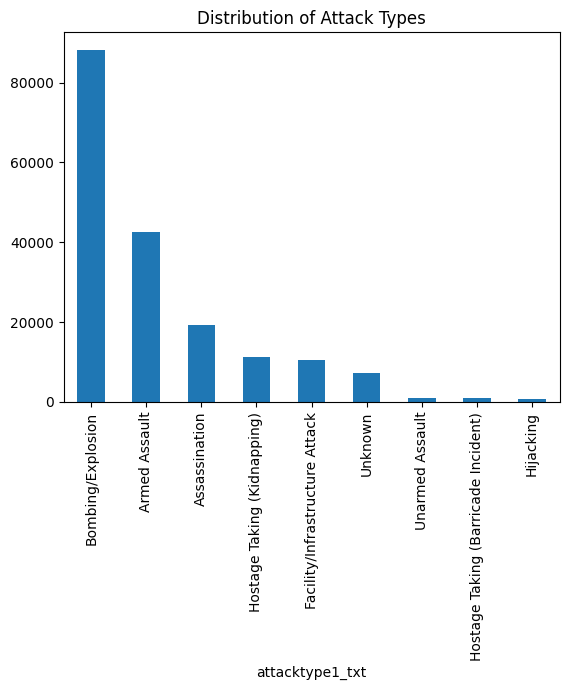

In [21]:
import matplotlib.pyplot as plt

df_cleaned['attacktype1_txt'].value_counts().plot(kind='bar', title='Distribution of Attack Types')
plt.show()

Top 3 attack types are Bombing, Armed Assault and Assassination.

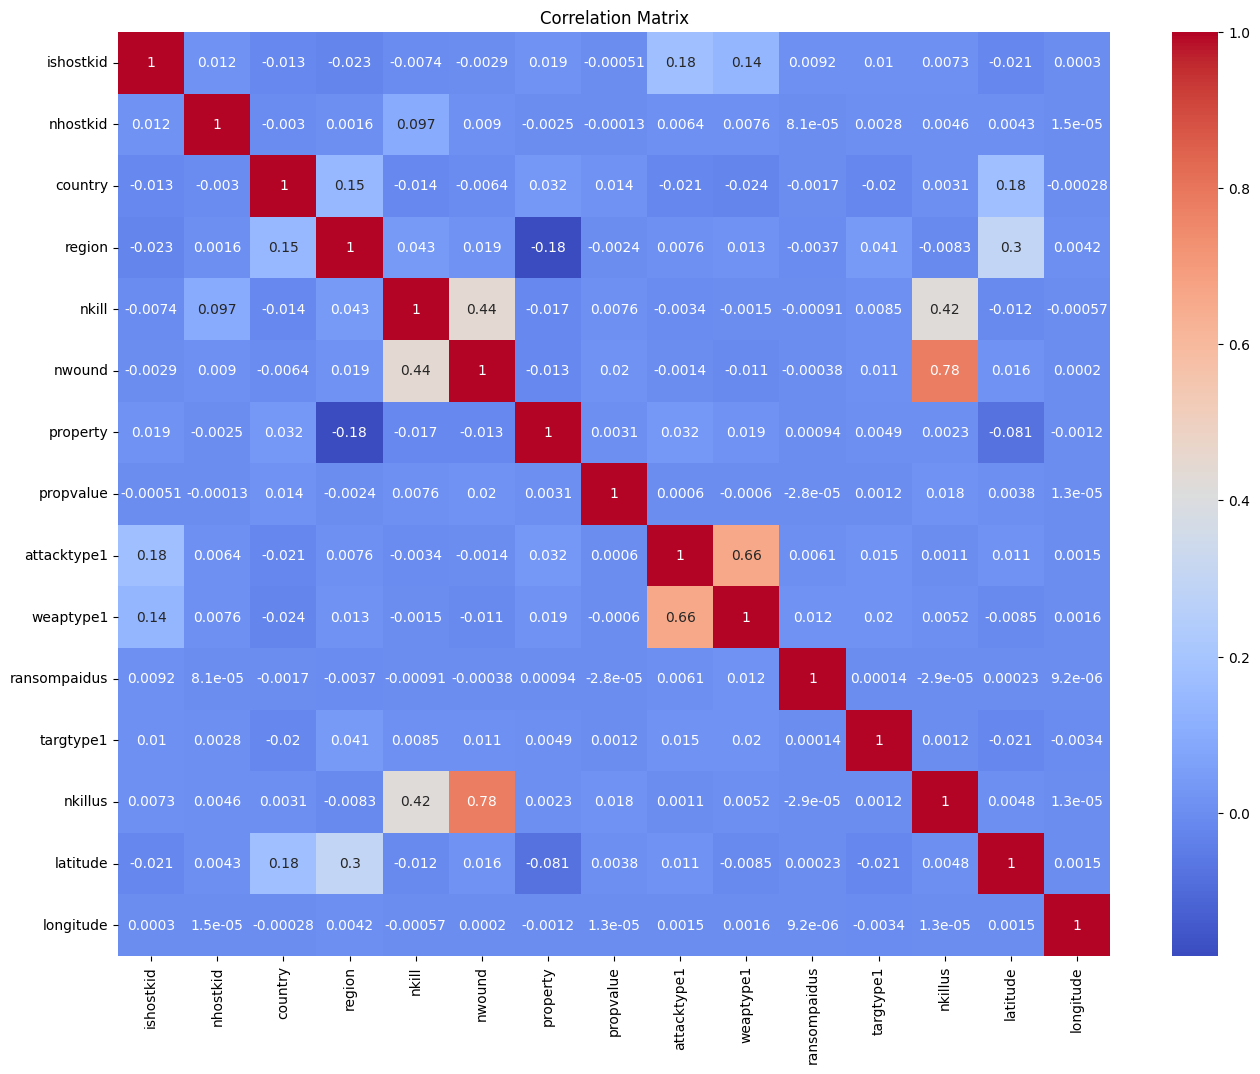

In [22]:
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlations to explore: property and region, nomber of people killed and number of kids killed, number of people wound and number of kids killed, number of people killed and number of people wound

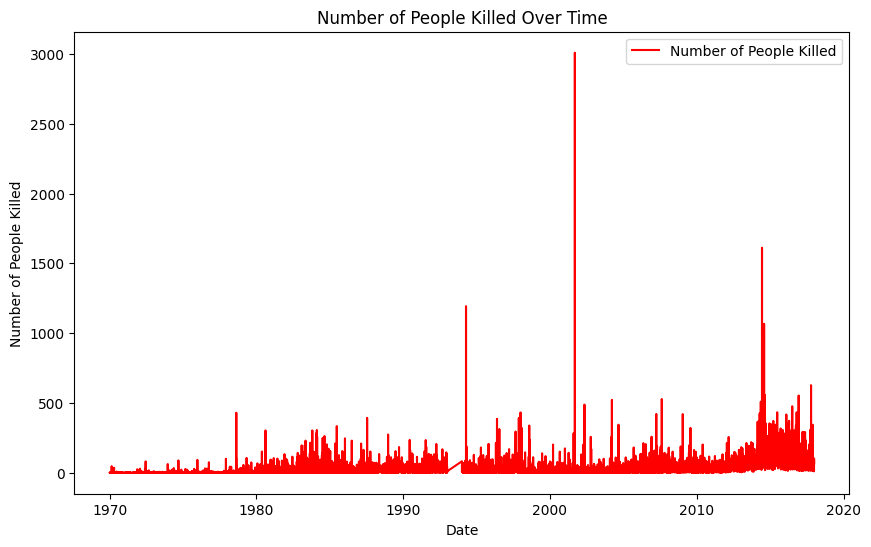

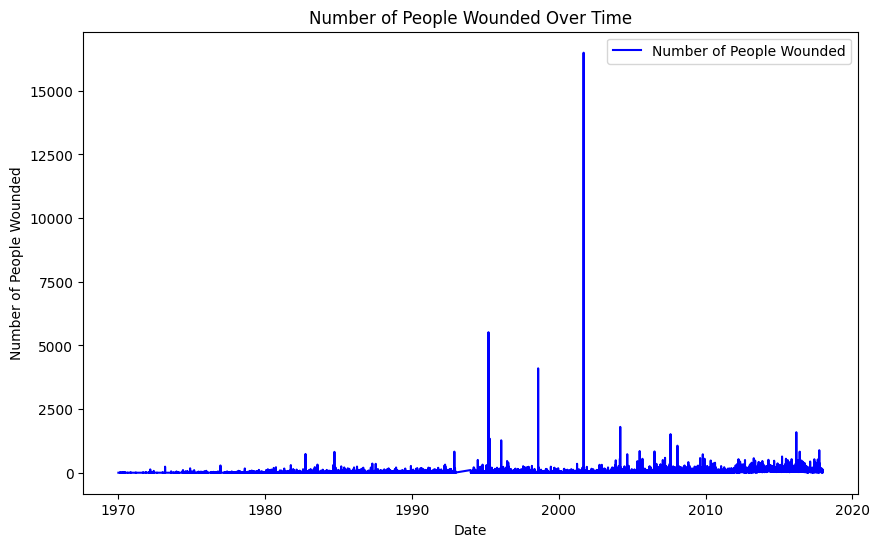

In [23]:
# Ensure 'date' column is in datetime format
df_killed = df_numeric.copy()
df_killed['date']=df_cleaned['date'].copy()

# Group data by date and sum the number of killed and wounded
df_grouped = df_killed.groupby('date').agg({'nkill': 'sum' , 'nwound': 'sum'}).reset_index()

# Plot 1: Number of People Killed Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['nkill'], label='Number of People Killed', color='red')
plt.xlabel('Date')
plt.ylabel('Number of People Killed')
plt.title('Number of People Killed Over Time')
plt.legend()
plt.show()

# Plot 2: Number of People Wounded Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['nwound'], label='Number of People Wounded', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of People Wounded')
plt.title('Number of People Wounded Over Time')
plt.legend()
plt.show()

We can notice, that with time attacks became more sivier - more people are killrd. Including such outliers as 9/11.

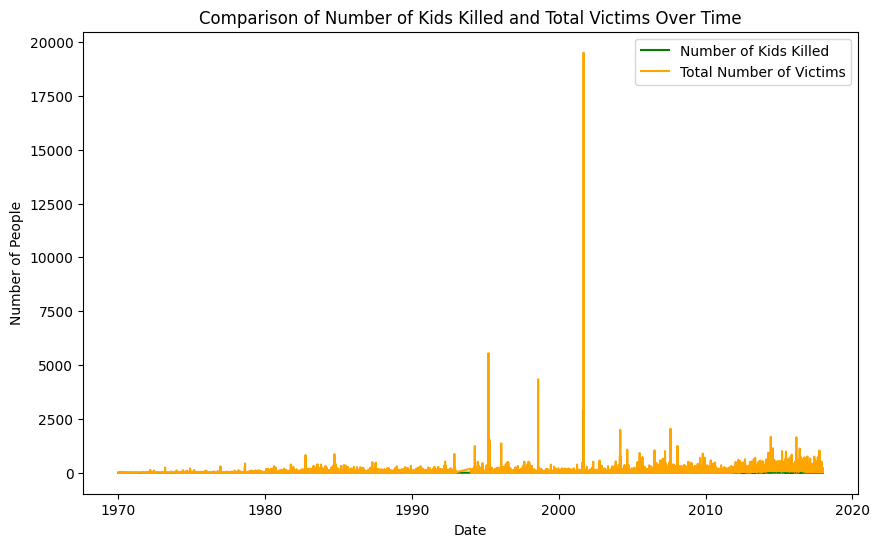

In [24]:
df_kids = df_numeric.copy()
df_kids['date'] = df_cleaned['date'].copy()

# Group data by date and sum the number of kids kidnapped (nhostkid) and all victims (nkill + nwound)
df_grouped = df_kids.groupby('date').agg({'nkillus': 'sum', 'nkill': 'sum', 'nwound': 'sum'}).reset_index()

# Adding a column for the total number of victims (killed + wounded)
df_grouped['total_victims'] = df_grouped['nkill'] + df_grouped['nwound']

# Plot: Comparing Number of Kids Kidnapped vs. Total Victims Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['nkillus'], label='Number of Kids Killed', color='green')
plt.plot(df_grouped['date'], df_grouped['total_victims'], label='Total Number of Victims', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Comparison of Number of Kids Killed and Total Victims Over Time')
plt.legend()

# Display the plot
plt.show()

Number of kids killed in atacks is really not big, if we compare it with all the people killed.